# Predizione della possibilità di avere il diabete

Progetto di programmazione di applicazioni di Data Intensive, A.A. 2023/2024

**A cura di: Lorenzo Rigoni**

Email: lorenzo.rigoni2@studio.unibo.it

## Introduzione

Per il mio progetto ho deciso di utilizzare un dataset che mi permettesse di prevedere se un paziente potrebbe avere il diabete. Il dataset è stato preso da _Kaggle_: https://www.kaggle.com/datasets/iammustafatz/diabetes-prediction-dataset

## Caricamento delle librerie

Innanzitutto, occorre importare le librerie che saranno utili durante lo sviluppo del progetto. Nello specifico, queste librerie sono:
- *NumPy*: utile per operazioni su array a N dimensioni
- *pandas*: utile per caricare e manipolare i dati che usermo
- *matplotlib*: utile per rappresentare su grafici i nostri dati

Le librerie verranno usate con i loro alias convenzionali e, per quanto riguarda i grafici, verrà abilitato l'inserimento direttamente nel notebook.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

## Caricamento dei dati

Dopo aver incluso le librerie necessarie, andiamo a scaricare i dati da un file _CSV_ e inseriamoli in un dataframe creato con la libreria _Pandas_.

In [2]:
import os.path

FILE = "diabetes_prediction_dataset.csv"
if not os.path.exists(FILE):
    print("Dataset not found")

patients = pd.read_csv(FILE)

In [3]:
patients.info(verbose=False, memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Columns: 9 entries, gender to diabetes
dtypes: float64(3), int64(4), object(2)
memory usage: 17.3 MB


In [4]:
patients.head(1)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0


In [5]:
patients.dtypes

gender                  object
age                    float64
hypertension             int64
heart_disease            int64
smoking_history         object
bmi                    float64
HbA1c_level            float64
blood_glucose_level      int64
diabetes                 int64
dtype: object

Come è possibile vedere, il dataset ha 100000 entries e 9 features. Quest'ultime, sono nello specifico:

- `gender`: il sesso del paziente
- `age`: l'età del paziente
- `hypertension`: indica se il paziente soffre di ipertensione oppure no
- `heart_disease`: indica se il paziente soffre di problemi al cuore
- `smoking_history`: indica se il paziente è un fumatore
- `bmi`: l'indice di massa del paziente
- `HbA1c_level`: (emoglobina A1c) è una misura del livello medio di zucchero nel sangue del paziente negli ultimi 2-3 mesi
- `blood_glucose_level`: indica il quantitativo di glucosio del paziente
- `diabetes`: indica se il paziente ha il diabete oppure no

Chiaramente, la nostra variabile target sarà `diabetes`, la quale avrà valore `0` se il paziente non ha il diabete e `1` se invece lo ha.

Per ridurre lo spazio in memoria utilizzato dal dataset, andiamo a specificare le colonne categoriche.

In [8]:
categorical = ["smoking_history"]

patients = pd.read_csv(FILE, dtype={x: "category" for x in categorical})

patients['gender'] = patients['gender'].replace({'Female': 1, 'Male': 0, 'Other': 2})
patients['gender'] = patients['gender'].astype(int)

patients.info(verbose=False, memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Columns: 9 entries, gender to diabetes
dtypes: category(1), float64(3), int32(1), int64(4)
memory usage: 5.8 MB


## Analisi generale dei dati

Andiamo a esplorare i dati che abbiamo. Innanzitutto, vediamo ogni feature quanti valori diversi ha.

In [9]:
patients.nunique()

gender                    3
age                     102
hypertension              2
heart_disease             2
smoking_history           6
bmi                    4247
HbA1c_level              18
blood_glucose_level      18
diabetes                  2
dtype: int64

Possiamo notare come abbiamo molte età differenti con anche molte situazioni fisiche diverse.

In [15]:
patients.describe()

,gender,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.585880,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,0.492937,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.000000,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,0.000000,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,1.000000,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,1.000000,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,2.000000,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


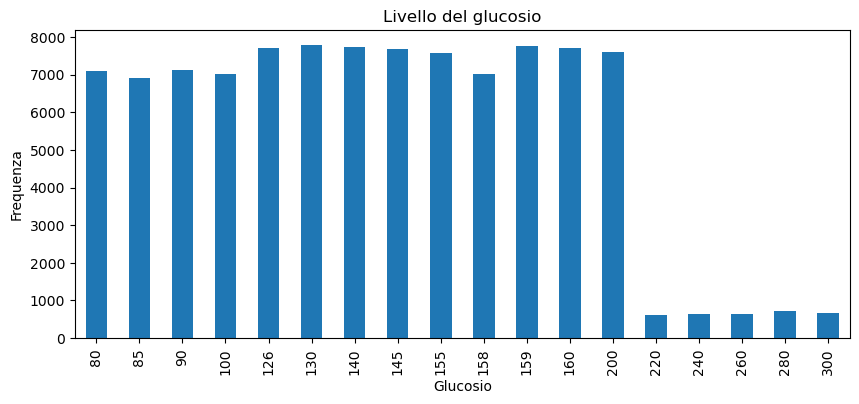

In [16]:
patients['blood_glucose_level'].value_counts()[:20].sort_index().plot.bar(figsize=(10, 4))
plt.title("Livello del glucosio")
plt.xlabel("Glucosio")
plt.ylabel("Frequenza")
plt.show();

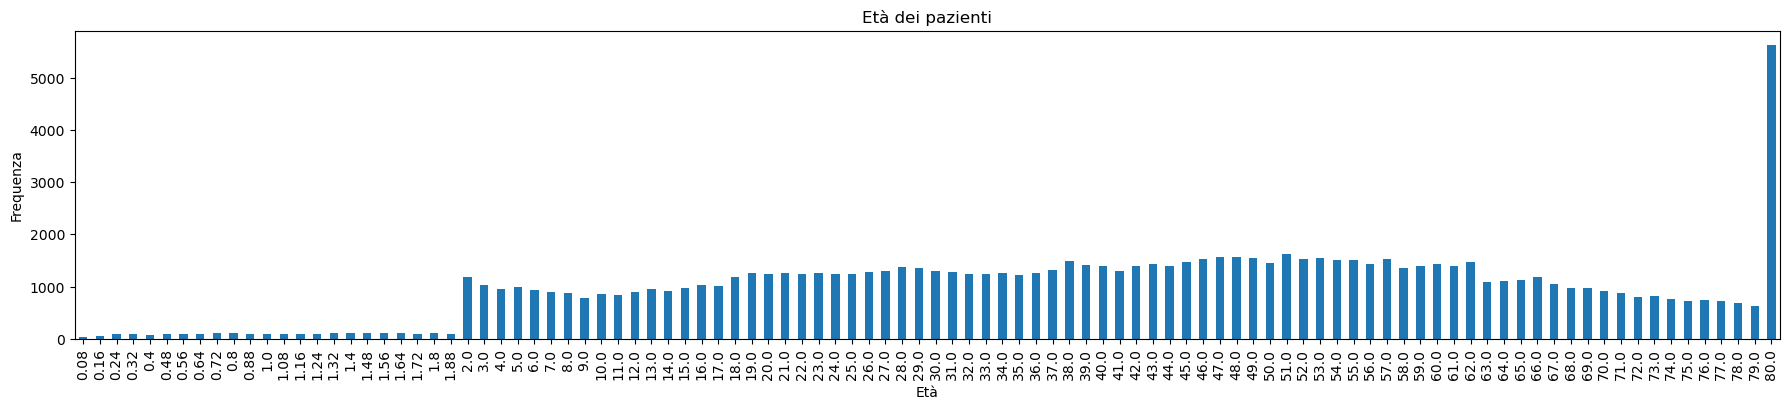

In [29]:
patients['age'].value_counts().sort_index().plot.bar(figsize=(22, 4))
plt.title("Età dei pazienti")
plt.xlabel("Età")
plt.ylabel("Frequenza")
plt.show();

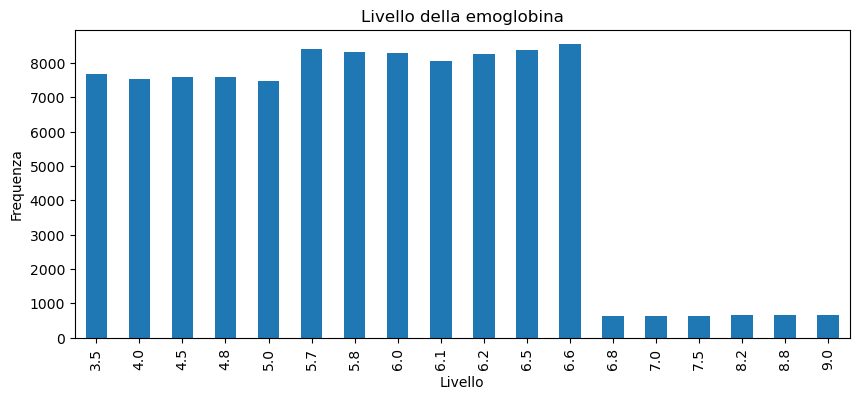

In [37]:
patients['HbA1c_level'].value_counts().sort_index().plot.bar(figsize=(10, 4))
plt.title("Livello della emoglobina")
plt.xlabel("Livello")
plt.ylabel("Frequenza")
plt.show();

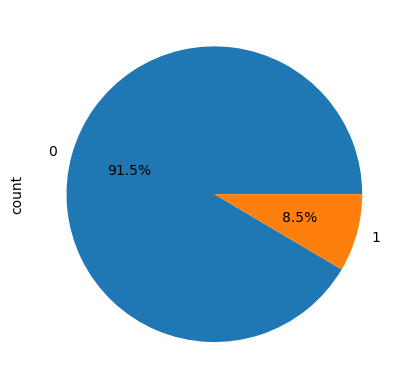

In [30]:
patients['diabetes'].value_counts().plot.pie(autopct='%1.1f%%');

Dai grafici proposti, sappiamo che la maggior parte delle persone ha il livello di glucosio sotto il 200, il livello di emoglobina sotto il 6.8 e più di 5000 persone hanno 80 anni. Sarà necessario nella fase di _data cleaning_ valutare i dati che alterano le statistiche.